In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [4]:
def slow_dft(signal):
    signal = np.asarray(signal, dtype=complex)
    length = signal.shape[0]
    idx = np.arange(length)
    freq = idx.reshape((length, 1))
    matrix = np.exp(-2j * np.pi * freq * idx / length)
    return matrix @ signal


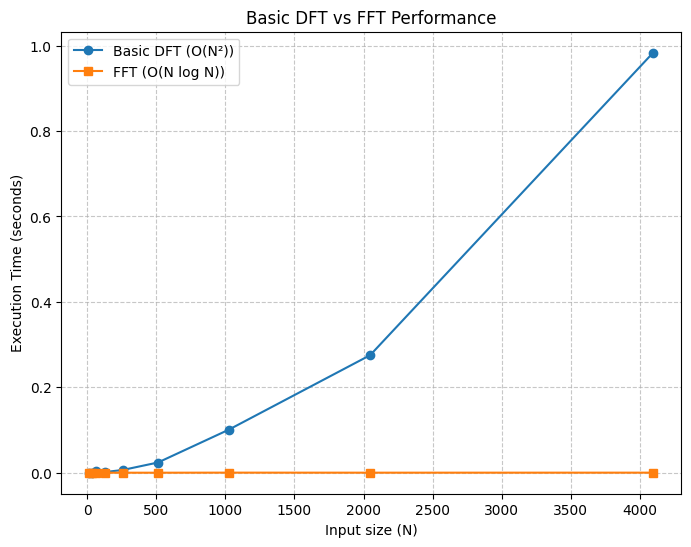

In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Different variable names
def basic_dft(signal):
    signal = np.asarray(signal, dtype=complex)
    length = signal.shape[0]
    idx = np.arange(length)
    freq = idx.reshape((length, 1))
    mat = np.exp(-2j * np.pi * freq * idx / length)
    return np.dot(mat, signal)

# Renamed variables for sizes and timing lists
dimensions = [2**p for p in range(4, 13)]
basic_times = []
fast_times = []

for dim in dimensions:
    seq = np.random.rand(dim)

    # Time for basic_dft
    begin = time.perf_counter()
    basic_dft(seq)
    finish = time.perf_counter()
    basic_times.append(finish - begin)

    # Time for numpy's fft
    begin = time.perf_counter()
    np.fft.fft(seq)
    finish = time.perf_counter()
    fast_times.append(finish - begin)

# Plot results
plt.figure(figsize=(8,6))
plt.plot(dimensions, basic_times, 'o-', label="Basic DFT (O(N²))")
plt.plot(dimensions, fast_times, 's-', label="FFT (O(N log N))")
plt.xlabel("Input size (N)")
plt.ylabel("Execution Time (seconds)")
plt.title("Basic DFT vs FFT Performance")
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.legend()
plt.show()
